## Table of Contents

- [1. Data Extraction](#1)
- [2. Data Preprocessing](#2)
- [3. Exploratory Data Analysis](#3)
    - [3.1 Data Distribution](#3_1)
    - [3.2 Time Series Analysis](#3_2)
    - [3.3 Customer Grouping](#3_3)
- [4. Clarifying Questions](#4)
- [5. Rough Plan](#5)

### 1. Data extraction <a class="anchor" id="1"></a>

In [1]:
# import libraries and data sources
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from IPython.display import display

In [2]:
try:
    df_contract = pd.read_csv('../datasets/contract.csv')
    df_internet = pd.read_csv('../datasets/internet.csv')
    df_personal = pd.read_csv('../datasets/personal.csv')
    df_phone = pd.read_csv('../datasets/phone.csv')

    dfs = [df_contract,df_internet,df_personal,df_phone]
    for df in dfs:
        display(df.head(),df.shape)
except:
    print("Data not found")

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


(7043, 8)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


(5517, 8)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


(7043, 5)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


(6361, 2)

The data provided contains various information on the company's customers. The dataframes are of varying sizes so there could be missing information for some customers.

In [3]:
# merge all dataframes
dfs = [df_internet,df_personal,df_phone]
df = df_contract
for d in dfs:
    df = pd.merge(df,d,on='customerID',how='left')

display(df.sample(5),df.shape)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
2232,6479-SZPLM,2017-02-01,No,Two year,No,Credit card (automatic),19.45,754.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,0,Yes,Yes,No
6608,4576-CSAJH,2018-02-01,2019-12-01 00:00:00,One year,Yes,Credit card (automatic),55.15,1193.05,DSL,No,Yes,No,Yes,No,No,Male,0,No,No,No
3722,8328-SKJNO,2018-03-01,No,One year,No,Bank transfer (automatic),40.65,947.4,DSL,Yes,Yes,No,Yes,No,No,Male,0,No,Yes,NaN
3973,3441-CGZJH,2016-07-01,No,One year,Yes,Credit card (automatic),60.40,2640.55,DSL,Yes,No,Yes,Yes,Yes,Yes,Female,0,Yes,Yes,NaN
1417,5651-WYIPH,2018-08-01,No,Month-to-month,Yes,Credit card (automatic),49.85,865.75,DSL,No,Yes,No,No,No,No,Female,1,No,No,No


(7043, 20)

We have merged all customer data into one dataframe. Now to rename columns for consistency.

In [4]:
def camel_to_snake(name):
  name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
  return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

for column in df.columns:
    df = df.rename(columns={column:camel_to_snake(column)})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   internet_service   5517 non-null   object 
 9   online_security    5517 non-null   object 
 10  online_backup      5517 non-null   object 
 11  device_protection  5517 non-null   object 
 12  tech_support       5517 non-null   object 
 13  streaming_tv       5517 non-null   object 
 14  streaming_movies   5517 non-null   object 
 15  gender             7043 non-null   object 
 16  senior_citizen     7043 

Our missing data is in the binary columns of service information which should be available to the company- this needs to be answered by the company as it accounts for part of our data. In the mean time we will only look at data that has full customer information because assuming the missing data as No/0 could create imbalance in the data.

In [5]:
# drop missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
display(df.shape)

(4835, 20)

### 2. Data Preprocessing <a class="anchor" id="2"></a>

The datatype of `begin_date` should be DateTime, `total_charges` should be a float, there are a few class type columns that can be converted to ordinal, and all the columns with Yes/No values and `gender` should be changed to binary like the `senior_citizen` column. We will need to explore `end_date` more in depth as it has a combination of dates and binary and it's the most important column- our target.

#### Convert Data Types

##### Dates and Floats

In [6]:
df[pd.to_numeric(df['total_charges'],errors='coerce').isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,DSL,Yes,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,DSL,No,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,Yes
6754,2775-SEFEE,2020-02-01,No,Two year,Yes,Bank transfer (automatic),61.90,,DSL,Yes,Yes,No,Yes,No,No,Male,0,No,Yes,Yes


We have found that that the `total_charges` column contains empty strings (cannot be converted to float). These rows will be removed and this could be another question for the company.

In [7]:
indices = df[pd.to_numeric(df['total_charges'],errors='coerce').isna()].index
df = df.drop(index=indices)

try:
    df['total_charges'] = pd.to_numeric(df['total_charges'])
    print("total_charges data type:")
    print(df['total_charges'].dtypes)
except:
    print('error converting')

total_charges data type:
float64


In [8]:
try:
    df['begin_date'] = pd.to_datetime(df['begin_date']).dt.normalize()
    print('begin_date data type:')
    print(df['begin_date'].dtypes)
except:
    print('Error converting')

begin_date data type:
datetime64[ns]


##### Binary

In [9]:
# check value_counts of all relevant columns to confirm if we want binary/ordinal encoding
for col in df.columns:
    if (
        col != 'customer_id' and 
        col != 'begin_date' and 
        col != 'end_date' and 
        col != 'monthly_charges' and 
        col != 'total_charges'
    ):
        print(df[col].value_counts(),'\n')

Month-to-month    2975
One year           964
Two year           893
Name: type, dtype: int64 

Yes    3337
No     1495
Name: paperless_billing, dtype: int64 

Electronic check             2017
Bank transfer (automatic)    1068
Credit card (automatic)      1037
Mailed check                  710
Name: payment_method, dtype: int64 

Fiber optic    3096
DSL            1736
Name: internet_service, dtype: int64 

No     3098
Yes    1734
Name: online_security, dtype: int64 

No     2693
Yes    2139
Name: online_backup, dtype: int64 

No     2717
Yes    2115
Name: device_protection, dtype: int64 

No     3079
Yes    1753
Name: tech_support, dtype: int64 

Yes    2420
No     2412
Name: streaming_tv, dtype: int64 

Yes    2433
No     2399
Name: streaming_movies, dtype: int64 

Male      2424
Female    2408
Name: gender, dtype: int64 

0    3846
1     986
Name: senior_citizen, dtype: int64 

No     2481
Yes    2351
Name: partner, dtype: int64 

No     3574
Yes    1258
Name: dependents, dtype: in

In [10]:
binary_cols = [
    'paperless_billing',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'partner',
    'dependents',
    'multiple_lines'
]

for col in binary_cols:
    df[col] = np.where(df[col] == 'Yes', 1, 0)
    
df.rename(columns = {'gender':'male'}, inplace = True)
df['male'] = np.where(df['male'] == 'Male', 1, 0)
binary_cols.append('male')
df[binary_cols].head()

,paperless_billing,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,partner,dependents,multiple_lines,male
1,0,1,0,1,0,0,0,0,0,0,1
2,1,1,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,1,1,0,0,1,0
6,1,0,1,0,0,1,0,0,1,1,1


##### Ordinal

In [11]:
df = df.replace(
    {
        'Month-to-month': 'monthly',
        'One year':'annually',
        'Two year':'bi_annually',
        'Electronic check': 'electronic_check',
        'Bank transfer (automatic)':'bank_transfer',
        'Credit card (automatic)': 'credit_card',
        # We don't want to lose the information about automated payment methods (see below)
        'Mailed check':'mailed_check',
        'Fiber optic': 'fiber_optic',
        'DSL':'dsl'
    }
)

ord_cols = [
    'internet_service',
    'type',
    'payment_method'
]

df_encoded = pd.get_dummies(df, columns=ord_cols)

# here we return the automated payment data (this binary value will be 1 if it's by cc or bank transfer)
df_encoded['payment_method_automated'] = df_encoded['payment_method_credit_card'] + df_encoded['payment_method_bank_transfer']

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4832 entries, 1 to 7042
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   customer_id                      4832 non-null   object        
 1   begin_date                       4832 non-null   datetime64[ns]
 2   end_date                         4832 non-null   object        
 3   paperless_billing                4832 non-null   int32         
 4   monthly_charges                  4832 non-null   float64       
 5   total_charges                    4832 non-null   float64       
 6   online_security                  4832 non-null   int32         
 7   online_backup                    4832 non-null   int32         
 8   device_protection                4832 non-null   int32         
 9   tech_support                     4832 non-null   int32         
 10  streaming_tv                     4832 non-null   int32      

All of the feature columns have been converted to their proper datatype.

### 3. Exploratory Data Analysis <a class="anchor" id="3"></a>

#### 3.1 Data Distribution <a class="anchor" id="3_1"></a>

We will investigate the distributions of our nominal features.

In [13]:
df_encoded[['monthly_charges','total_charges']].describe()

,monthly_charges,total_charges
count,4832.000000,4832.000000
mean,81.761207,2902.470788
std,18.306134,2415.564128
min,42.900000,42.900000
25%,69.787500,659.600000
50%,82.500000,2350.625000
75%,95.700000,4871.150000
max,118.750000,8684.800000


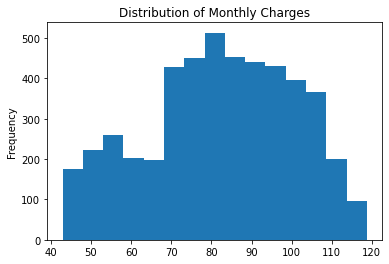

In [14]:
df_encoded['monthly_charges'].sort_values().plot(kind='hist',bins=15,title='Distribution of Monthly Charges');

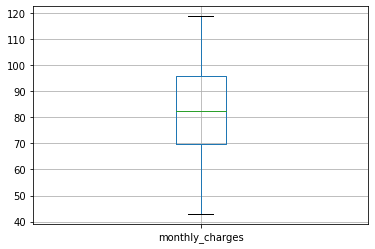

In [15]:
df_encoded[['monthly_charges']].boxplot();

The monthly charges are normally distributed. The customers have a good variety of payment amounts, implying there are a variety of services they are receiving.

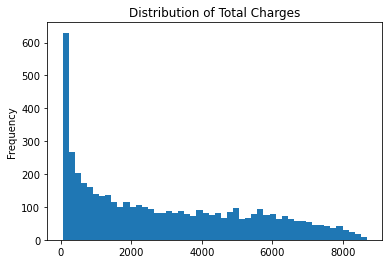

In [16]:
df_encoded['total_charges'].sort_values().plot(kind='hist',bins=50,title='Distribution of Total Charges');

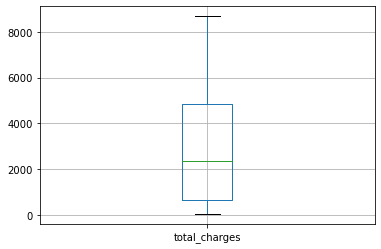

In [17]:
df_encoded[['total_charges']].boxplot();

There is a right skew to distribution of total charges. This means that there is more short-term customers that haven't been charged much.

### 3.2 Time Series Analysis <a class="anchor" id="3_2"></a>

We will now examine our `end_date` and `start_date` with time series.

In [18]:
date_cols = ['begin_date','end_date']
dfr = df_encoded[date_cols]
dfr.head()

,begin_date,end_date
1,2017-04-01,No
2,2019-10-01,2019-12-01 00:00:00
4,2019-09-01,2019-11-01 00:00:00
5,2019-03-01,2019-11-01 00:00:00
6,2018-04-01,No


In [19]:
dfr_1 = dfr.rename(columns={"begin_date":"date"})
dfr_1 = dfr_1.set_index('date').sort_index()
dfr_1 = dfr_1.resample('1M').count()
dfr_1 = dfr_1.rename(columns={"end_date":"customers_joined"})
dfr_1.head()

,customers_joined
date,
2013-10-31,3
2013-11-30,2
2013-12-31,3
2014-01-31,6
2014-02-28,269


In [20]:
dfr['end_date'] = pd.to_datetime(dfr['end_date'],errors='coerce').dt.normalize()
dfr_2 = dfr[dfr['end_date'].notna()]
dfr_2 = dfr_2.rename(columns={"end_date":"date"})
dfr_2 = dfr_2.set_index('date').sort_index()
dfr_2 = dfr_2.resample('1M').count()
dfr_2 = dfr_2.rename(columns={"begin_date":"customers_left"})
dfr_2.head()

,customers_left
date,
2019-10-31,401
2019-11-30,414
2019-12-31,392
2020-01-31,379


In [21]:
dfr = pd.merge(dfr_1,dfr_2,on='date',how='outer')
dfr = dfr.fillna(0)
dfr.sample(5)

,customers_joined,customers_left
date,,
2016-01-31,41,0.0
2016-10-31,45,0.0
2018-05-31,46,0.0
2018-03-31,58,0.0
2015-04-30,48,0.0


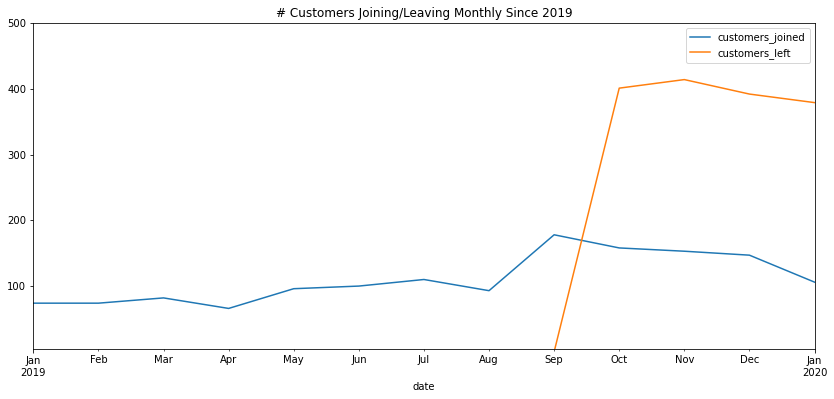

In [22]:
dfr['2019-01-30':'2022-01-31'].plot(title='# Customers Joining/Leaving Monthly Since 2019',figsize=(14,6),ylim=(4,500));

There has been a gradually slow increase in new customers with some decline recently. There is a significant amount of customers leaving recently. We can narrow investigations into the cause of the recent churn spike to Sep-Oct of 2019. We need to ask the company if they made any significant changes during this period.

### 3.3 Customer Grouping <a class="anchor" id="3_3"></a>

As there are far too many features to accurately cluster customer groups we will:
- simplify the `begin_date` (the year will suffice) and `end_date` (should be binary)
- sum the number of extra services from `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `multiple_lines` and `internet_service_fiber_optic` into one
- combine the `type_annually` and `type_bi_annually` as they are yearly plans as oppose to the monthly plan

In [23]:
df_encoded['begin_year'] = df_encoded['begin_date'].dt.year

def simplify_end_date(row):
    if row == 'No':
        return 0
    else:
        return 1

df_encoded['end_date'] = df_encoded['end_date'].apply(simplify_end_date)

display(df_encoded[['begin_year','end_date']].dtypes)
display(df_encoded['end_date'].value_counts())
display(df_encoded[['begin_year','end_date']].sample(5))

df_encoded['num_services'] = (
    df_encoded['online_security'] + 
    df_encoded['online_backup'] + 
    df_encoded['device_protection'] +
    df_encoded['tech_support'] +
    df_encoded['streaming_tv'] +
    df_encoded['streaming_movies'] +
    df_encoded['multiple_lines'] +
    df_encoded['internet_service_fiber_optic']
)

df_encoded['type_yearly'] = df_encoded['type_annually'] + df_encoded['type_bi_annually']

df_encoded.info()

begin_year    int64
end_date      int64
dtype: object

0    3246
1    1586
Name: end_date, dtype: int64

,begin_year,end_date
5121,2017,0
3119,2017,1
5154,2018,1
1836,2017,1
6070,2015,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4832 entries, 1 to 7042
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   customer_id                      4832 non-null   object        
 1   begin_date                       4832 non-null   datetime64[ns]
 2   end_date                         4832 non-null   int64         
 3   paperless_billing                4832 non-null   int32         
 4   monthly_charges                  4832 non-null   float64       
 5   total_charges                    4832 non-null   float64       
 6   online_security                  4832 non-null   int32         
 7   online_backup                    4832 non-null   int32         
 8   device_protection                4832 non-null   int32         
 9   tech_support                     4832 non-null   int32         
 10  streaming_tv                     4832 non-null   int32      

In [24]:
X = df_encoded.iloc[:, [2, 4, 5, 12, 13, 14, 15, 26, 27, 28, 29]].values

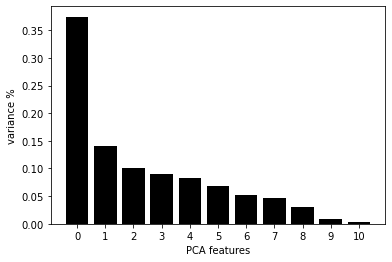

In [25]:
# data must be standardized for pca
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X_std)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show();

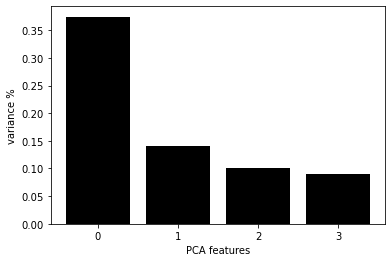

In [26]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_std)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show();

In [27]:
pca_components = pd.DataFrame(pca.components_)
pca_components = pca_components.rename(columns={
    0:"end_date",
    1:"monthly_charges",
    2:"total_charges",
    3:"male",
    4:"senior",
    5:"married",
    6:"dependents",
    7:"automated_pay",
    8:"begin_year",
    9:"num_services",
    10:"yearly_contract"
})

print(pca_components)

   end_date  monthly_charges  total_charges      male    senior   married  \
0 -0.206914         0.320194       0.465081 -0.000005 -0.006280  0.245478   
1  0.354657         0.471642       0.094855 -0.059015  0.446893 -0.243963   
2  0.398804         0.205105      -0.052645  0.221025  0.089902  0.532256   
3  0.123716         0.045448      -0.034284 -0.966170 -0.062302  0.094627   

   dependents  automated_pay  begin_year  num_services  yearly_contract  
0    0.135748       0.229971   -0.444647      0.414672         0.370249  
1   -0.478157      -0.187631    0.003981      0.286868        -0.184153  
2    0.535289      -0.328656    0.096891      0.085512        -0.211271  
3    0.175563       0.002520    0.042021      0.030270        -0.040280  


- CC1 = longest-time customers with most services, most stayed as customers, families, longest contract, pay automatically

- CC2 = older no family, left as customer, most monthly cost with many services, short contract

- CC3 = most family-oriented, most left, shortest contract, less auto pay

- CC4 = women, very average

(CC stands for customer cluster)

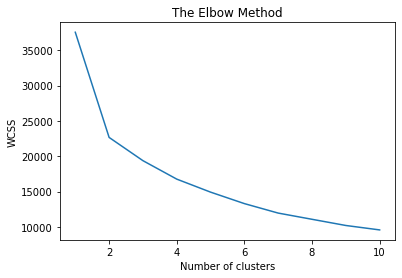

In [28]:
# use elbow method to find best number of clusters
PCA_components = pd.DataFrame(principalComponents).values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12345)
    kmeans.fit(PCA_components)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 12345)
y_kmeans = kmeans.fit_predict(PCA_components)

PCA_components_df = pd.DataFrame(PCA_components)
PCA_components_df['cluster'] = y_kmeans

PCA_components_df.groupby("cluster").mean()

,0,1,2,3
cluster,,,,
0,2.432980,0.178549,-0.306211,-0.059430
1,-0.923583,1.330623,0.420446,0.004529
2,-1.983141,-0.385134,-0.607443,-0.103279
3,0.200018,-1.458598,0.923336,0.258181


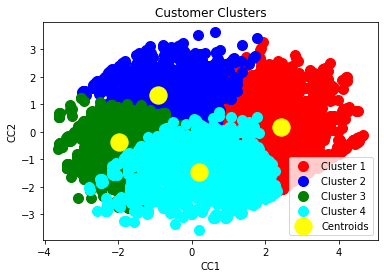

In [30]:
plt.scatter(PCA_components[y_kmeans == 0, 0], PCA_components[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(PCA_components[y_kmeans == 1, 0], PCA_components[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(PCA_components[y_kmeans == 2, 0], PCA_components[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(PCA_components[y_kmeans == 3, 0], PCA_components[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customer Clusters')
plt.xlabel('CC1')
plt.ylabel('CC2')
plt.legend()
plt.show()

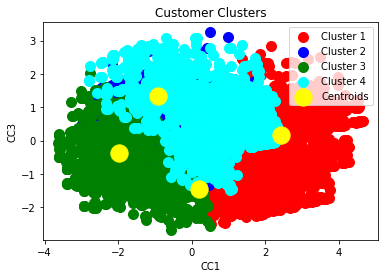

In [31]:
plt.scatter(PCA_components[y_kmeans == 0, 0], PCA_components[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(PCA_components[y_kmeans == 1, 0], PCA_components[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(PCA_components[y_kmeans == 2, 0], PCA_components[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(PCA_components[y_kmeans == 3, 0], PCA_components[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customer Clusters')
plt.xlabel('CC1')
plt.ylabel('CC3')
plt.legend()
plt.show()

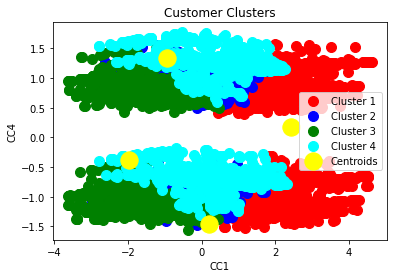

In [32]:
plt.scatter(PCA_components[y_kmeans == 0, 0], PCA_components[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(PCA_components[y_kmeans == 1, 0], PCA_components[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(PCA_components[y_kmeans == 2, 0], PCA_components[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(PCA_components[y_kmeans == 3, 0], PCA_components[y_kmeans == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customer Clusters')
plt.xlabel('CC1')
plt.ylabel('CC4')
plt.legend()
plt.show()

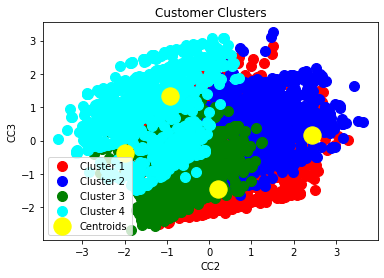

In [33]:
plt.scatter(PCA_components[y_kmeans == 0, 1], PCA_components[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(PCA_components[y_kmeans == 1, 1], PCA_components[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(PCA_components[y_kmeans == 2, 1], PCA_components[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(PCA_components[y_kmeans == 3, 1], PCA_components[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customer Clusters')
plt.xlabel('CC2')
plt.ylabel('CC3')
plt.legend()
plt.show()

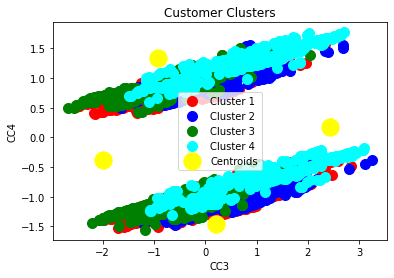

In [34]:
plt.scatter(PCA_components[y_kmeans == 0, 2], PCA_components[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(PCA_components[y_kmeans == 1, 2], PCA_components[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(PCA_components[y_kmeans == 2, 2], PCA_components[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(PCA_components[y_kmeans == 3, 2], PCA_components[y_kmeans == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customer Clusters')
plt.xlabel('CC3')
plt.ylabel('CC4')
plt.legend()
plt.show()

## 4. Clarifying Questions <a class="anchor" id="4"></a>

- The spreadsheets for phone and internet are smaller than contract/personal. Is this because some customers only subscribe to phone or internet service? (I ask this because in Canada its prohibitively expensive to have home internet without a landline or vice-versa because telecom companies package them together)
- The customers with ID's '2775-SEFEE', '4075-WKNIU', and '5709-LVOEQ' don't have total charges. Is this because they are brand new customers and their total charges should be 0?
- Were there any significant changes to the company or the market for its products or services around September 2019?
- How does the company's marketing segment customers?
- How long does the company expect to train predictive models now and in the future for further models?

## 5. Rough Plan <a class="anchor" id="5"></a>

### 5.1 Data Preparation

- insert missing data based on company answers
- standardize nominal data
- split train and test data

### 5.2 Train Models

- train baseline ROC/AUC and accuracy with some boosted linear regression models
- evaluate the models and decide on one
- hypertune the chosen model

### 5.3 Conclusion

- write conclusion